In [1]:
import matplotlib
%matplotlib nbagg
from matplotlib import pyplot

In [2]:
from statiskit import (linalg,
                       core,
                       pgm)

In [3]:
import math
import os

# Simuler un graphe cordal $\Theta$ et les données data avec le fichier sampling

In [4]:
if not 'K' in os.environ:
    os.environ['K'] = str(10)
K = int(os.environ.get('K'))
simulation = !jupyter nbconvert --ExecutePreprocessor.timeout=3600 --to notebook --execute sampling.ipynb --output sampling.ipynb
graph = pgm.read_gml(os.path.join('results', 'graph.gml'))
while not graph.is_chordal:
    simulation = !jupyter nbconvert --ExecutePreprocessor.timeout=3600 --to notebook --execute sampling.ipynb --output sampling.ipynb
    graph = pgm.read_gml(os.path.join('results', 'graph.gml'))
data = core.read_csv(os.path.join('results', 'data.csv'))
data


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,$-0.11$,$2.15$,$0.34$,$-1.03$,$-1.06$,$0.84$,$0.46$,$-0.35$,$-0.36$,$-0.39$
1,$0.85$,$1.12$,$-0.06$,$0.42$,$-0.19$,$-0.05$,$0.35$,$0.40$,$0.12$,$0.36$
2,$0.59$,$0.48$,$-0.50$,$-0.69$,$0.25$,$0.37$,$2.04$,$-1.10$,$0.05$,$0.46$
3,$-0.15$,$-1.73$,$1.19$,$-0.67$,$-1.95$,$-0.52$,$1.90$,$0.27$,$-0.85$,$0.73$
4,$0.34$,$1.15$,$0.19$,$-0.86$,$-0.73$,$0.48$,$-0.83$,$0.60$,$1.04$,$0.17$
5,$1.79$,$0.07$,$-0.78$,$0.03$,$-3.50$,$0.60$,$-0.24$,$0.15$,$0.63$,$-0.48$
6,$0.33$,$-0.76$,$-2.66$,$-0.24$,$-0.32$,$0.18$,$1.00$,$-0.95$,$-0.50$,$-0.86$
7,$0.50$,$2.02$,$0.54$,$0.19$,$-0.47$,$0.81$,$1.88$,$0.82$,$-0.19$,$0.01$
8,$-2.06$,$-0.04$,$0.91$,$-0.11$,$0.74$,$0.22$,$-0.27$,$-0.86$,$0.95$,$1.32$
9,$1.15$,$0.14$,$0.84$,$-0.04$,$0.04$,$1.01$,$-0.42$,$-0.39$,$-0.11$,$-1.60$


# Estimation par maximum vraisemblance MLE

In [5]:
mle = pgm.graphical_gaussian_estimation(algo='ml',
                                        data=data,
                                        graph=graph)

# Estimation par   newton-raphson

In [6]:
algo = os.environ.get('ALGO', 'nr')

In [7]:
import time
prev = time.time()
nre = pgm.graphical_gaussian_estimation(algo=algo,
                                        data=data,
                                        graph=graph)
curr = time.time()

# Calcul de $\widehat{\Theta}_{ML}$  et  $\widehat{\Theta}_{NR}$

In [8]:
theta_ML = mle.estimated.graph
theta_NR = nre.estimated.graph

<IPython.core.display.Javascript object>


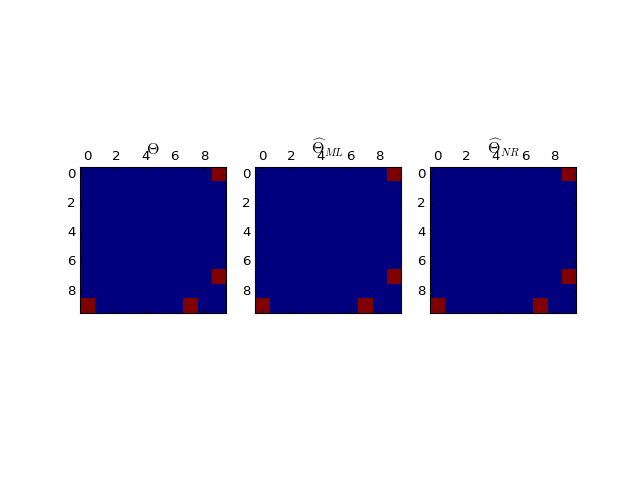

In [9]:
fig = pyplot.figure()
axes = graph.to_matrix().plot(axes = fig.add_subplot(131))
axes.set_title(r'$\Theta$')
axes = theta_ML.to_matrix().plot(axes = fig.add_subplot(132))
axes.set_title(r'$\widehat{\Theta}_{ML}$')
axes = theta_NR.to_matrix().plot(axes = fig.add_subplot(133))
axes.set_title(r'$\widehat{\Theta}_{NR}$')

# Comparaison des deux algorithmes.

In [10]:

LLH_ML = 2 * mle.estimated.loglikelihood(data)

LLH_NR = 2 * nre.estimated.loglikelihood(data)


(LLH_ML - LLH_NR )/LLH_ML

0.013447867589572159

In [11]:
LLH_ML, LLH_NR

(-233.6296875354168, -230.4878664324474)

In [12]:
import math
with open(os.path.join('results', 'estimation.csv'), 'a') as filehandler:
    filehandler.write(', '.join([str(K), str(algo), str(curr-prev), str((LLH_ML - LLH_NR )/math.fabs(LLH_ML))]) + '\n')

In [22]:
algo = os.environ.get('criterion', 'BIC')
criter = core.selection(data=data,
                        algo="criterion",
                        dict(ml = LLH_ML))
criter

SyntaxError: non-keyword arg after keyword arg (<ipython-input-22-18a4b34f52ee>, line 4)